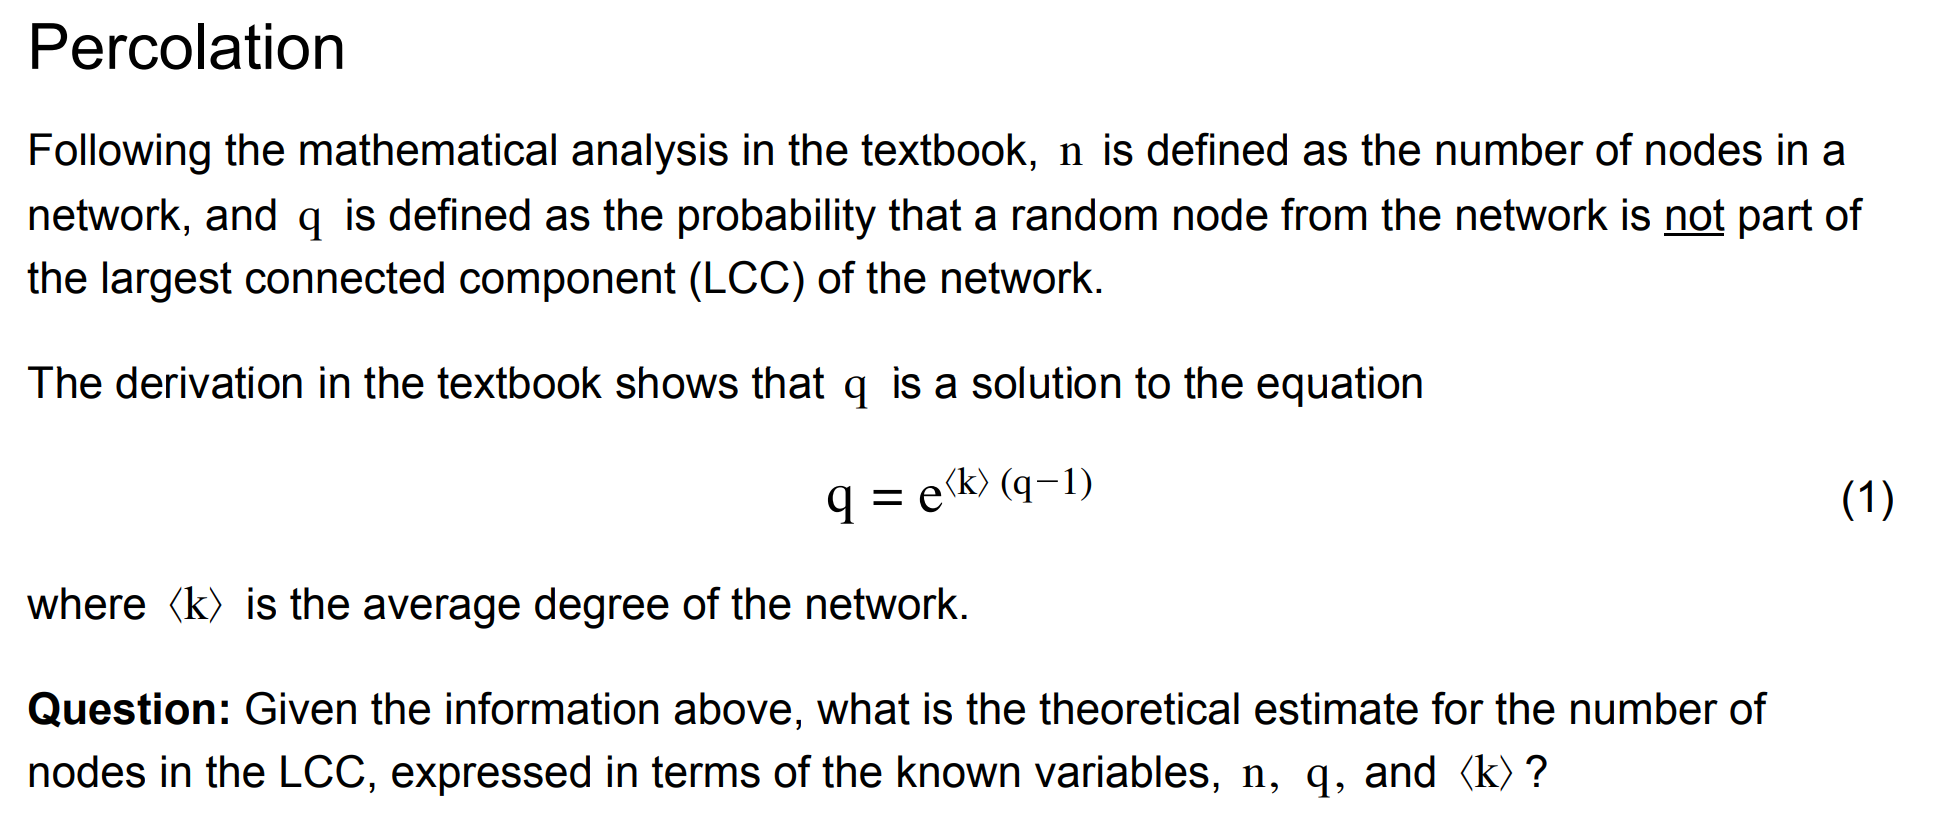

Since q denotes the probability that a node IS NOT part of the LLC, its compliment (1-q) denotes the probability that it IS part of the LLC. Each of n nodes, given no other information, has an equal probability of being part of the LLC. The expected size of the LLC then, is given by n * (1-q).

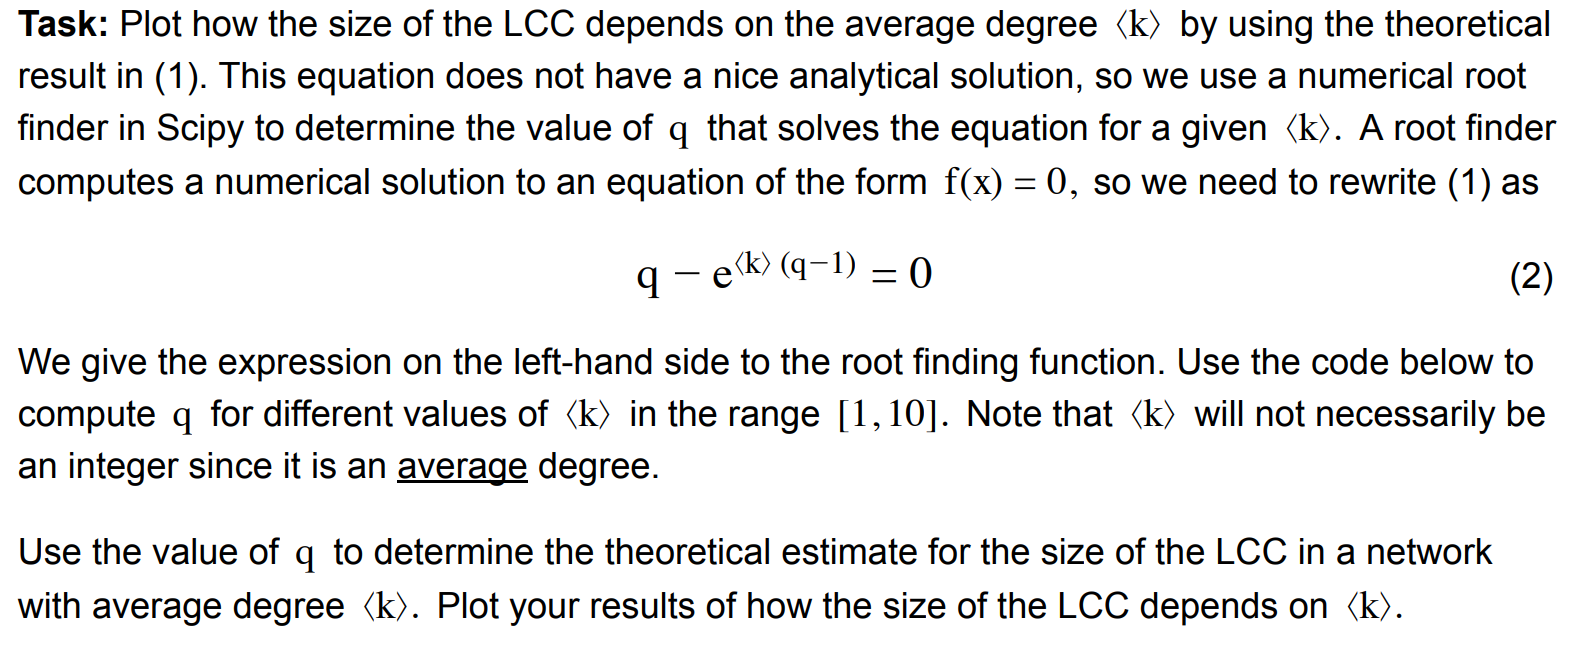

In [32]:
def calculate_q(k):
    '''
    Use a numerical root finder to determine q from the equation
    q = exp(k*(q­1)).
    '''
    from scipy.optimize import root
    return root(lambda q: q - np.exp(k * (q - 1)), 0).x[0]


def calculate_LLC(k):
    '''
    Calculates the expected size of the LLC as a function of the average degree k,
    using the formula n * (1-q) derived above.
    '''
    #Arbitrary, large n (n must be larged for expression for q to be valid)
    n=10**6

    q = calculate_q(k)
    return n * (1-q)


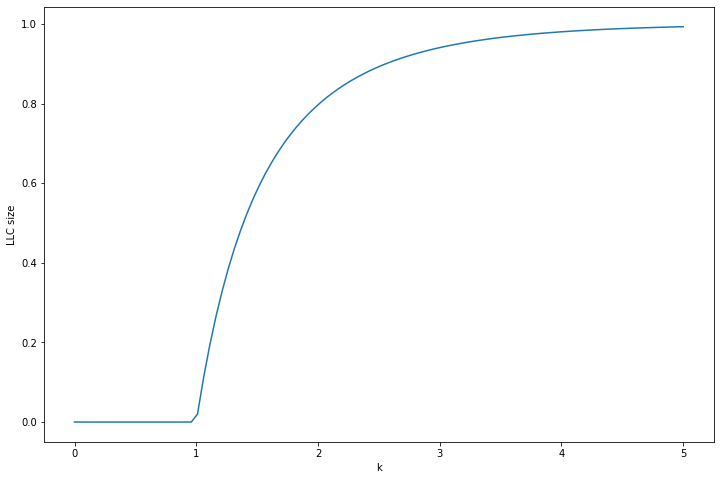

In [36]:
import matplotlib.pyplot as plt
import numpy as np
#Compute LLC size for k in range 0, 5
k_list = np.linspace(0, 5, 100)
#Divide by n to get LLC as a proportion of network
n=10**6
LLC_size_list = [calculate_LLC(k)/n for k in k_list]

#Plot LLC as a function of k
plt.figure(figsize=(12, 8))
plt.plot(k_list, LLC_size_list)
plt.xlabel("k")
plt.ylabel("LLC size")
plt.show()

There is a strong threshold at k>1. That is, when the average degree of nodes is larger than 1, the size of the LLC increases rapidly towards the limit where every node is a part of the LLC. This is in agreement with the results discussed in the reading.